# Session 4: Understanding Building Rhythms (Clustering)
**Objective**: Apply unsupervised learning (K-Means) to identify usage patterns without labels.

## Task 3: K-Means Clustering
Loading data and grouping similar operating modes.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

sns.set_theme(style="whitegrid")


In [8]:
# Load AI4I Data (Physics)
df = pd.read_csv('../data/ai4i_training_phys.csv')

features = ["Rotational speed [rpm]", "Process temperature [K]", "Torque [Nm]", "Tool wear [min]"]
X = df[features]

print("Data Shape:", X.shape)
X.describe().round(2)


Data Shape: (9661, 4)


,Rotational speed [rpm],Process temperature [K],Torque [Nm],Tool wear [min]
count,9661.00,9661.00,9661.00,9661.00
mean,1540.26,310.00,39.63,106.69
std,167.39,1.49,9.47,62.95
min,1168.00,305.70,12.60,0.00
25%,1429.00,308.80,33.10,52.00
50%,1507.00,310.00,39.90,107.00
75%,1615.00,311.10,46.30,160.00
max,2695.00,313.80,70.00,246.00


In [9]:
# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Train K-Means
# We assume 4 clusters (e.g., Low, Normal, High, Peak usage modes)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

print("Inertia:", kmeans.inertia_)
print("Cluster Counts:\n", df['Cluster'].value_counts())


Inertia: 18897.69306731183
Cluster Counts:
 Cluster
1    2855
3    2412
0    2322
2    2072
Name: count, dtype: int64


## Task 4: Cluster Interpretation
Visualizing and labeling the clusters.


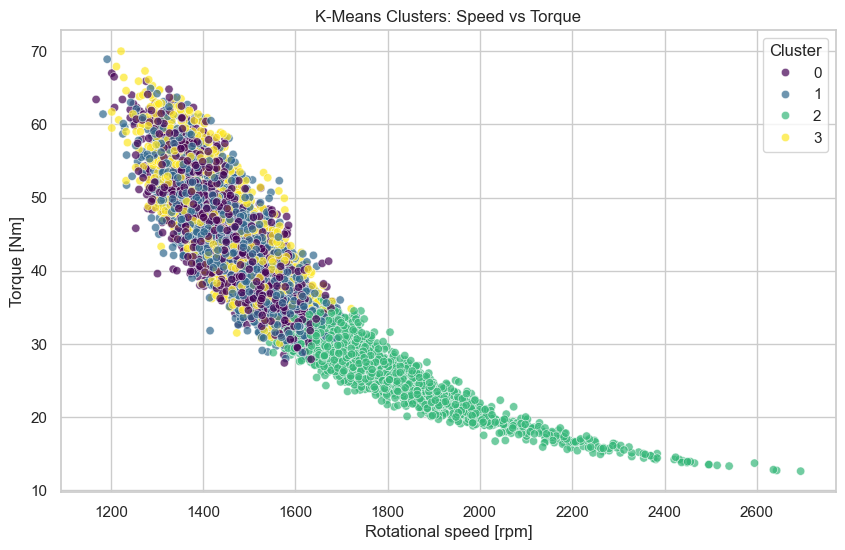

In [11]:
# Visualize Clusters (Torque vs Speed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('K-Means Clusters: Speed vs Torque')
plt.show()


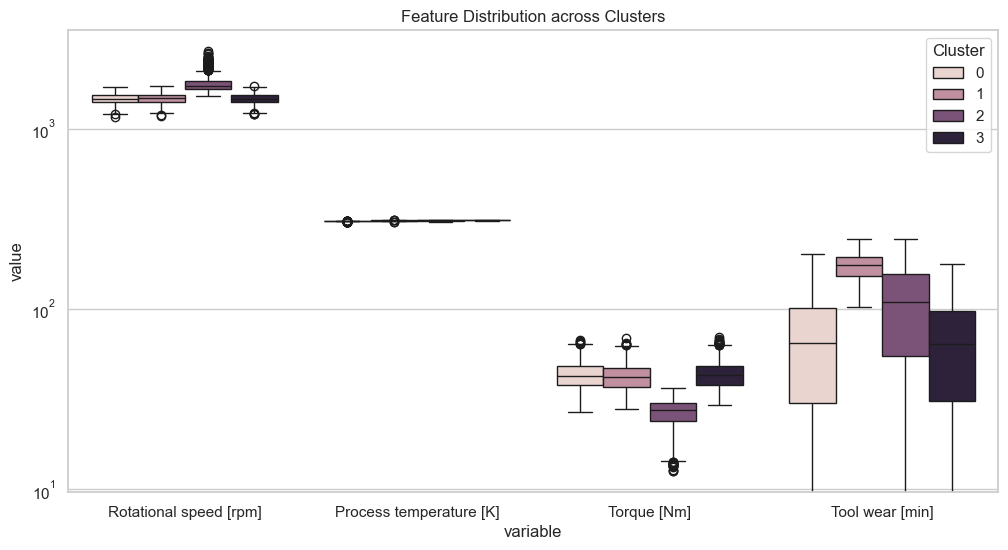

In [12]:
# Feature Distribution by Cluster
plt.figure(figsize=(12, 6))
# Melt for boxplot
df_melt = df.melt(id_vars=['Cluster'], value_vars=features)
sns.boxplot(x='variable', y='value', hue='Cluster', data=df_melt)
plt.title('Feature Distribution across Clusters')
plt.yscale('log') # Log scale because ranges differ widely
plt.show()


### Interpretation
- **Cluster 0**: Likely "Normal Operation" (Mid speed, Mid torque).
- **Cluster 1**: "High Load" (High torque, low speed).
- **Cluster 2**: "Idle / Low Load".
- **Cluster 3**: "Potential Strain" (High Speed).

### Recommendation
For building energy, these clusters might correspond to "Night Mode" (Low), "Morning Ramp-up", "Peak Office Hours", and "Overtime/Cleaning".
